<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/kalman/Kalman_Filters_for_Nifty_ema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykalman
!pip install yfinance
!pip install pandas-ta==0.2.45b
#!pip install ffn

In [2]:
#Importing dependencies#
from pykalman import KalmanFilter
import numpy as np
import pylab as pl
import pandas as pd
import yfinance as yf
from scipy import poly1d
from datetime import datetime
import pandas_ta as ta
import matplotlib.pyplot as plt

%matplotlib inline
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

[*********************100%***********************]  1 of 1 completed


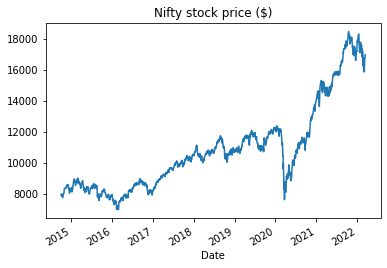

In [3]:
nifty_df = yf.download('^nsei',start='2014-10-01') # 2018
nifty_df['Adj Close'].plot(title='Nifty stock price ($)');

In [4]:
#nifty_df = yf.download('sbin.ns',start='2014-01-01',progress=False)


In [5]:
df = nifty_df[['Adj Close']]


mean 16695.634310837933


Text(0.5, 0, 'Days')

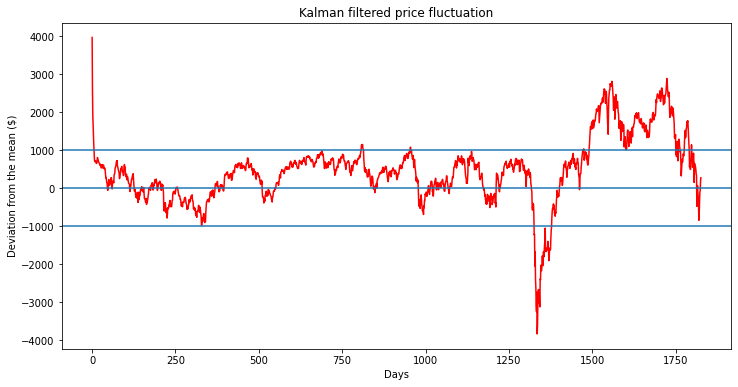

In [6]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean, cov = f.filter(df['Adj Close'].values)
mean, std = mean.squeeze(), np.std(cov.squeeze())
print(f'mean {mean[-1]}')

plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'].values - mean, 'red', lw=1.5)

plt.axhline(y=0)
plt.axhline(y=1000)
plt.axhline(y=-1000)
plt.title("Kalman filtered price fluctuation")
plt.ylabel("Deviation from the mean ($)")
plt.xlabel("Days")

In [7]:
df.tail(2)

,Adj Close
Date,
2022-03-14,16871.300781
2022-03-16,16975.349609


In [8]:
spread= pd.DataFrame({'Date':df.index,'spread':(df['Adj Close'].values - mean)})

In [9]:
spread=spread.set_index('Date')

In [10]:
df_new=pd.concat([df,spread['spread']],axis=1)


In [11]:
'''
SDev = 0.0
banda_supe = 0.0
banda_inf = 0.0
rapida = 26
lenta = 52
stdv = 0.8
m_rapida = ema(close,rapida)
m_lenta = ema(close,lenta)
BBMacd = m_rapida - m_lenta
Avg = ema(BBMacd,9)
SDev := stdev(BBMacd,9)
banda_supe := Avg + stdv * SDev
banda_inf := Avg - stdv * SDev
'''

'\nSDev = 0.0\nbanda_supe = 0.0\nbanda_inf = 0.0\nrapida = 26\nlenta = 52\nstdv = 0.8\nm_rapida = ema(close,rapida)\nm_lenta = ema(close,lenta)\nBBMacd = m_rapida - m_lenta\nAvg = ema(BBMacd,9)\nSDev := stdev(BBMacd,9)\nbanda_supe := Avg + stdv * SDev\nbanda_inf := Avg - stdv * SDev\n'

In [12]:
df_new['30 Day MA'] = df_new['spread'].rolling(window=50).mean()
# set .std(ddof=0) for population std instead of sample
df_new['30 Day STD'] = df_new['spread'].rolling(window=50).std() 
df_new['Upper Band'] = df_new['30 Day MA'] + (df_new['30 Day STD'] *2)
df_new['Lower Band'] = df_new['30 Day MA'] - (df_new['30 Day STD'] *2)
df_new['boll_percent'] = (df_new['spread']-df_new['Lower Band'])/(df_new['Upper Band']-df_new['Lower Band'])

In [13]:
df_new['30 Day MA'] = df_new['spread'].rolling(window=20).mean()
# set .std(ddof=0) for population std instead of sample
df_new['30 Day STD'] = df_new['spread'].rolling(window=20).std() 
df_new['Upper Band'] = df_new['30 Day MA'] + (df_new['30 Day STD'] *2)
df_new['Lower Band'] = df_new['30 Day MA'] - (df_new['30 Day STD'] *2)
df_new['boll_percent'] = (df_new['spread']-df_new['Lower Band'])/(df_new['Upper Band']-df_new['Lower Band'])

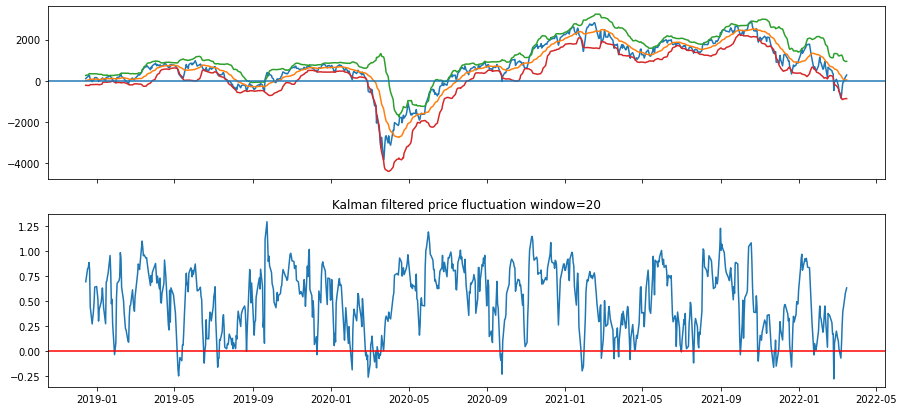

In [14]:
fig, ax = plt.subplots(2,1,figsize=(15,7),sharex=True)
#plt.plot(df_new['Adj Close'].values - mean, 'red', lw=1.5)
ax[0].plot(df_new[['spread','30 Day MA','Upper Band','Lower Band']][-800:])
ax[0].axhline(y=0)
#plt.axhline(y=1000)
#plt.axhline(y=-1000)
plt.title("Kalman filtered price fluctuation window=20")
#ax[0].ylabel("Deviation from the mean ($)")
#ax[0].xlabel("Days")
ax[1].plot(df_new[['boll_percent']][-800:])
ax[1].axhline(y=0,color='r')
plt.show()

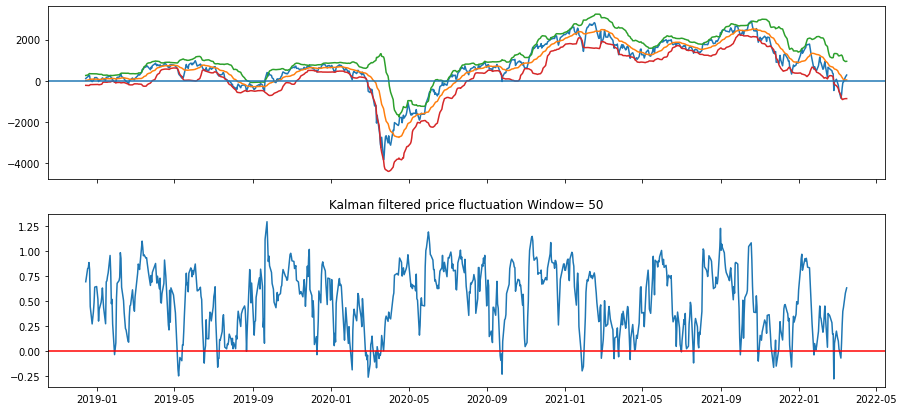

In [15]:
fig, ax = plt.subplots(2,1,figsize=(15,7),sharex=True)
#plt.plot(df_new['Adj Close'].values - mean, 'red', lw=1.5)
ax[0].plot(df_new[['spread','30 Day MA','Upper Band','Lower Band']][-800:])
ax[0].axhline(y=0)
#plt.axhline(y=1000)
#plt.axhline(y=-1000)
plt.title("Kalman filtered price fluctuation Window= 50")
#ax[0].ylabel("Deviation from the mean ($)")
#ax[0].xlabel("Days")
ax[1].plot(df_new[['boll_percent']][-800:])
ax[1].axhline(y=0,color='r')
plt.show()

In [16]:
nifty =pd.DataFrame({'Date': nifty_df.index,'Close':df['Adj Close'].values - mean})


In [17]:
nifty['30 Day MA'] = nifty['Close'].rolling(window=20).mean()
# set .std(ddof=0) for population std instead of sample
nifty['30 Day STD'] = nifty['Close'].rolling(window=20).std() 
nifty['Upper Band'] = nifty['30 Day MA'] + (nifty['30 Day STD'] *0.5)
nifty['Lower Band'] = nifty['30 Day MA'] - (nifty['30 Day STD'] *0.5)

nifty.ta.macd(fast=26,slow=50,signal=18, append=True)

print()

In [18]:
nifty=nifty.set_index('date')

In [19]:
nifty.tail(2)

,close,30 Day MA,30 Day STD,Upper Band,Lower Band,MACD_26_50_18,MACDh_26_50_18,MACDs_26_50_18
date,,,,,,,,
2022-03-14,178.477644,34.857044,449.285335,259.499712,-189.785623,-340.655617,-53.411908,-287.243709
2022-03-16,279.715299,41.071710,451.892870,267.018145,-184.874725,-322.541180,-31.581948,-290.959232


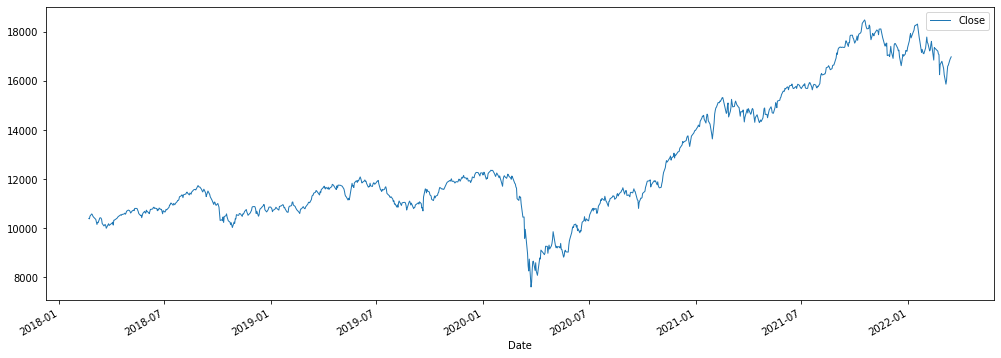

In [20]:
nifty_df[['Close']][-1000:].plot(figsize=(17,6),linewidth=1);

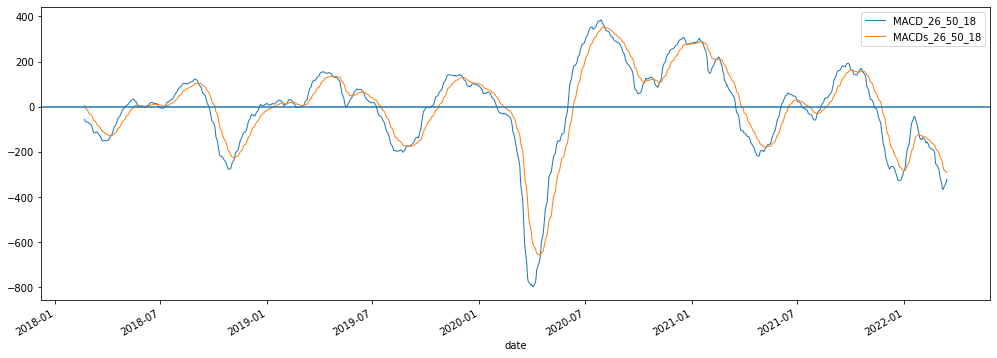

In [21]:
nifty[['MACD_26_50_18','MACDs_26_50_18']][-1000:].plot(figsize=(17,6),linewidth=1);
plt.axhline(y=0);

In [22]:
nifty['slope']=abs(nifty['MACD_26_50_18'].diff(5))
nifty['slope']=np.where(nifty['slope']<=10,0,nifty['slope'])
nifty['slope_s']=abs(nifty['MACDs_26_50_18'].diff(5))
nifty['slope_s']=np.where(nifty['slope_s']<=10,0,nifty['slope_s'])

In [23]:
nifty_df['Buy_ind'] = np.where((nifty['slope_s']>0), 1, 0)
#nifty['Sell_ind'] = np.where((nifty['slope_s']==-1), 0, 1)

In [24]:
nifty_df.Close.tail(5)

Date
2022-03-09    16345.349609
2022-03-10    16594.900391
2022-03-11    16630.449219
2022-03-14    16871.300781
2022-03-16    16975.349609
Name: Close, dtype: float64

In [25]:
l=-600

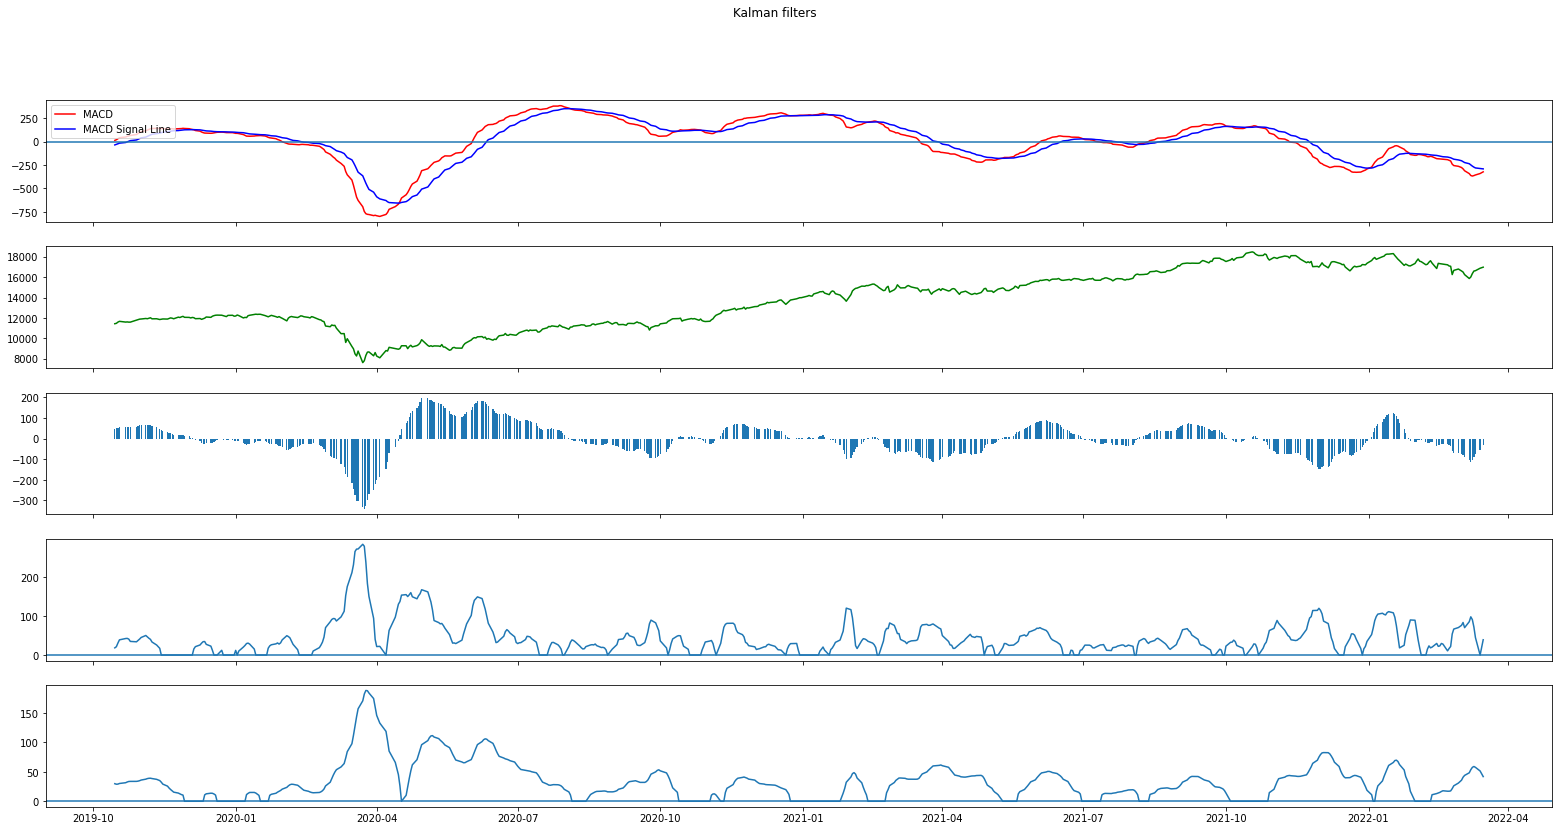

In [26]:
fig, ax = plt.subplots(5,1,figsize=(27,13),linewidth=1,sharex=True)
ax[0].plot(nifty.loc[:, :].index[l:], nifty.loc[:, 'MACD_26_50_18'][l:],'r', label='MACD')
ax[0].plot(nifty.loc[:, :].index[l:], nifty.loc[:, 'MACDs_26_50_18'][l:],'b', label='MACD Signal Line')
ax[2].bar(nifty.loc[:, :].index[l:], nifty.loc[:, 'MACDh_26_50_18'][l:], label='MACD Signal Line')
ax[1].plot(nifty_df.loc[:, :].index[l:], nifty_df.loc[:, 'Close'][l:],'g', label='NH moving avg 50 days')
#ax[1].scatter(nifty_df.loc[nifty_df['Buy_ind'] ==1,:].index[l:],nifty_df.loc[nifty_df['Buy_ind'] ==1,'Close'][l:] ,marker="*")
ax[3].plot(nifty.iloc[:, :].index[l:], nifty.loc[:, 'slope'][l:], label='Slope')
ax[4].plot(nifty.iloc[:, :].index[l:], nifty.loc[:, 'slope_s'][l:], label='Slope')
plt.suptitle('Kalman filters')
ax[0].axhline(y=0)
ax[3].axhline(y=0)
ax[4].axhline(y=0)
ax[0].legend(loc='upper left')
plt.show()


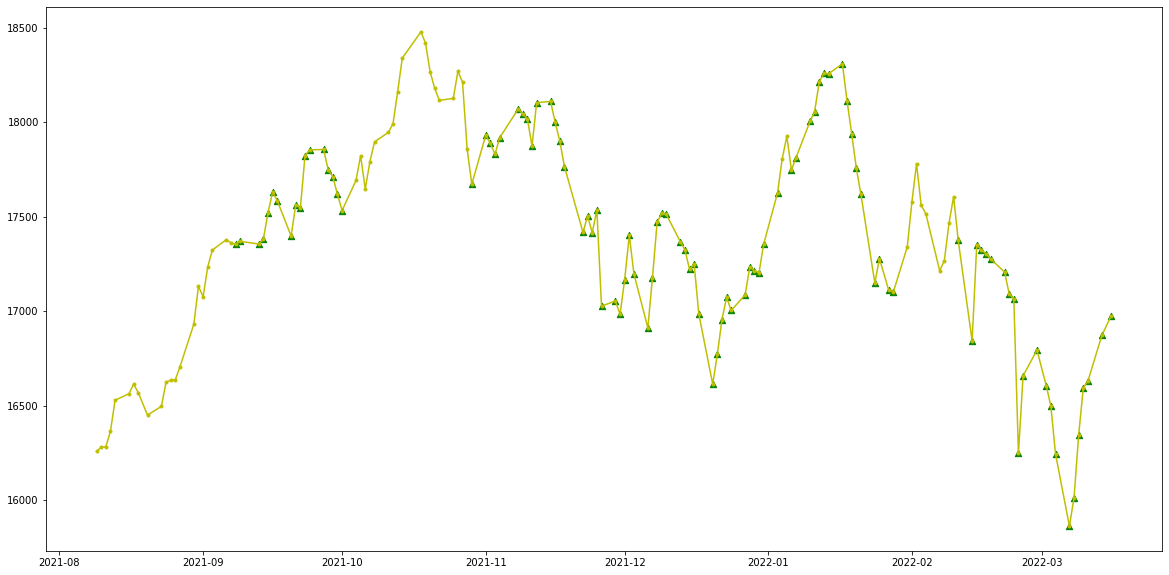

In [27]:
plt.figure(figsize=(20,10))
plt.plot(nifty_df.loc[:, :].index[-150:], nifty_df.loc[:, 'Close'][-150:],'y',marker='.')
plt.scatter(nifty_df.loc[nifty_df['Buy_ind'] ==1,:].index[-100:],nifty_df.loc[nifty_df['Buy_ind'] ==1,'Close'][-100:] ,marker="^",color='g',s=40)
#plt.scatter(nifty_df.loc[nifty_df['Buy_ind'] ==0,:].index[-1000:],nifty_df.loc[nifty_df['Buy_ind'] ==0,'Close'][-1000:] ,marker=".")

plt.show()

In [28]:
nifty.tail(1)

,close,30 Day MA,30 Day STD,Upper Band,Lower Band,MACD_26_50_18,MACDh_26_50_18,MACDs_26_50_18,slope,slope_s
date,,,,,,,,,,
2022-03-16,279.715299,41.07171,451.89287,267.018145,-184.874725,-322.54118,-31.581948,-290.959232,39.384014,41.927819


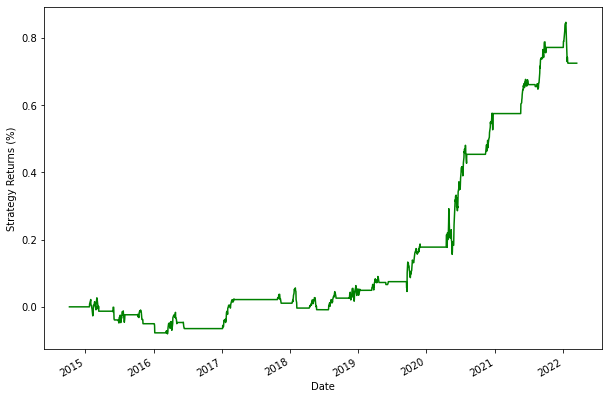

sharpe ratio :  0.03829555855333057
sortino ratio :  0.40669254439670616


In [29]:
nifty['sig']=np.where(nifty['MACDh_26_50_18']>0,1,-1)
nifty['sigs']=np.where(nifty['slope_s']>0,1,-1)
nifty['sigl']=nifty['sig']+nifty['sigs']
nifty['signals']=np.where(nifty['sigl']==2,1,0)
#nifty['signals']=np.where(nifty['sigl']==,1,nifty.signals)
# Calculate daily returns
nifty['Return'] = nifty_df.Close.pct_change()
 
# Calculate strategy returns
nifty['Strategy_F'] = nifty.Return * nifty.signals.shift(1)

# Calculate geometric returns
geometric_returns = ((nifty.Strategy_F+1).cumprod()-1)
#np.sum(np.log(data/data.shift())*portfolio, axis=1)
# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
volatility = geometric_returns.std() * np.sqrt(252)
sharpe_ratio = (geometric_returns.mean() - 0.05/252) / volatility 
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()
print('sharpe ratio : ' ,sharpe_ratio)
std_neg = geometric_returns[geometric_returns<0].std()*np.sqrt(252)
sortino_ratio=(geometric_returns.mean() - 0.05/252)/std_neg
print('sortino ratio : ' , sortino_ratio) 

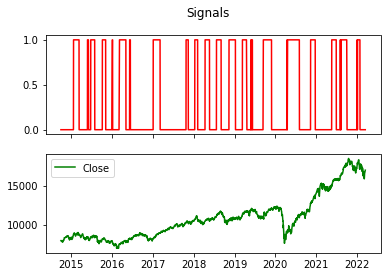

In [30]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(nifty.loc[:, :].index, nifty.loc[:, 'signals'],'r', label='Signals')
ax[1].plot(df.loc[:, :].index, df.loc[:, 'Adj Close'],'g', label='Close')
#ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('Signals')
ax[1].legend()
plt.show()


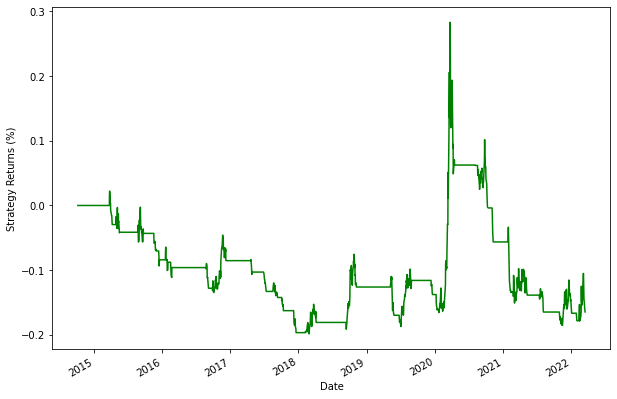

sharpe ratio :  -0.085071192504635
sortino ratio :  -0.13157455278158608


In [31]:
nifty['sig_s']=np.where(nifty['MACDh_26_50_18']<0,-1,1)
nifty['sigs_s']=np.where(nifty['slope_s']>0,-1,1)
nifty['sigl_s']=nifty['sig_s']+nifty['sigs_s']
nifty['signals_s']=np.where(nifty['sigl_s']==-2,-1,0)
#nifty['signals']=np.where(nifty['sigl']==,1,nifty.signals)
# Calculate daily returns
nifty['Return'] = nifty_df.Close.pct_change()
 
# Calculate strategy returns
nifty['Strategy_F'] = nifty.Return * nifty.signals_s.shift(1)

# Calculate geometric returns
geometric_returns = ((nifty.Strategy_F+1).cumprod()-1)
#np.sum(np.log(data/data.shift())*portfolio, axis=1)
# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
volatility = geometric_returns.std() * np.sqrt(252)
sharpe_ratio = (geometric_returns.mean() - 0.05/252) / volatility 
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()
print('sharpe ratio : ' ,sharpe_ratio)
std_neg = geometric_returns[geometric_returns<0].std()*np.sqrt(252)
sortino_ratio=(geometric_returns.mean() - 0.05/252)/std_neg
print('sortino ratio : ' , sortino_ratio) 